In [44]:
import serial
import time
import matplotlib.pyplot as plt

ser = serial.Serial('COM4', 9600)  # change if needed
time.sleep(10)  # allow Arduino to reboot
for _ in range(5):  # ignore initial lines
    ser.readline()

time_vals = []
temp_vals = []
setpoint_vals = []

start_time = None

while True:
    line = ser.readline().decode(errors='ignore').strip()
    try:
        t, temp, sp, pwm = map(float, line.split(','))

        if start_time is None:
            start_time = t

        time_vals.append((t - start_time) / 1000.0)  # seconds
        temp_vals.append(temp)
        setpoint_vals.append(sp)

        # Stop after enough data
        if time_vals[-1] > 1300:  # 17-18 minutes
            break

    except:
        continue

plt.figure(figsize=(8, 4))
plt.plot(time_vals, temp_vals, label="Measured Temperature", linewidth=2)
plt.plot(time_vals, setpoint_vals, '--', label="Setpoint", linewidth=2)

plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("PID Temperature Control Response")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


SerialException: ClearCommError failed (PermissionError(13, 'The device does not recognize the command.', None, 22))

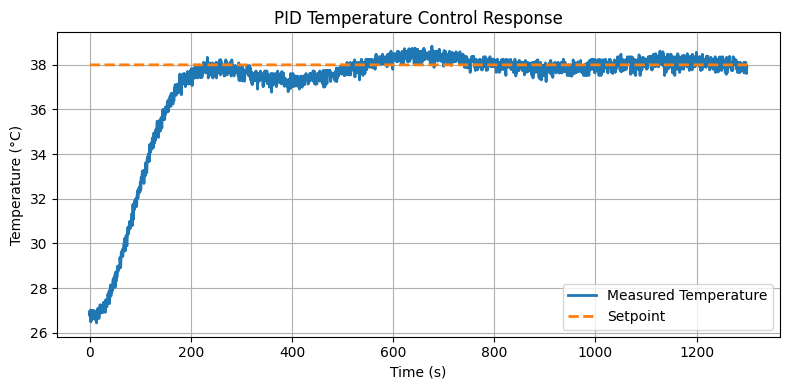

In [42]:
import numpy as np

window = 20 
temp_vals_smooth = np.convolve(temp_vals, np.ones(window)/window, mode='valid')
time_vals_smooth = time_vals[:len(temp_vals_smooth)]

plt.figure(figsize=(8,4))
plt.plot(time_vals_smooth, temp_vals_smooth, label="Measured Temperature", linewidth=2)
plt.plot(time_vals, setpoint_vals, '--', label="Setpoint", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("PID Temperature Control Response")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
